In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

FileNotFoundError: [Errno 2] File /Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv does not exist: '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv'

In [ ]:
results = results.rename(columns={"charge_solar": "Solar Charge", "charge_load": "Electricty Charge", "discharge_size": "Discharge", "current_solar": "Solar Power", "current_controlled_load_consumption": "Controlled Electricity Demand", "current_general_electricity_consumption": "General Electricity Demand", "current_charge": "Battery Charge Level"})
results

In [ ]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

In [ ]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [ ]:
# see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "discharge_size","current_controlled_load_consumption"])]

sns_plot = sns.lineplot(data=results_long[results_long.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "Discharge","Controlled Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "General Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

In [ ]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "General Electricity Demand", "Controlled Electricity Demand","Solar Power"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

## Exploring all files

In [12]:
import glob

path = '/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/results_30-03-2021/DDPG' # use your path
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['battery_size'] = filename.split("battery_")[1].split("_time")[0]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [24]:
frame_renamed = frame.rename(columns={"charge_solar": "Solar Charge", "charge_load": "Electricty Charge", "discharge_size": "Discharge", "current_solar": "Solar Power", "current_controlled_load_consumption": "Controlled Electricity Demand", "current_general_electricity_consumption": "General Electricity Demand", "current_charge": "Battery Charge Level"})

frame_long = frame_renamed.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime","battery_size"])
frame_long['battery_size'] = pd.to_numeric(frame_long.battery_size)
frame_long

,datetime,battery_size,variable,value
0,2013-01-14 00:00:00,1.4,Solar Charge,1.400000
1,2013-01-14 00:30:00,1.4,Solar Charge,0.295313
2,2013-01-14 01:00:00,1.4,Solar Charge,0.273605
3,2013-01-14 01:30:00,1.4,Solar Charge,1.344929
4,2013-01-14 02:00:00,1.4,Solar Charge,0.919506
...,...,...,...,...
8316667,2013-06-30 21:30:00,1.6,reward,-0.000000
8316668,2013-06-30 22:00:00,1.6,reward,-0.000000
8316669,2013-06-30 22:30:00,1.6,reward,-0.000000
8316670,2013-06-30 23:00:00,1.6,reward,-0.000000


In [39]:
pd.unique(frame_long.variable)

array(['Solar Charge', 'Electricty Charge', 'Discharge', 'Solar Power',
       'Controlled Electricity Demand', 'General Electricity Demand',
       'Battery Charge Level', 'reward'], dtype=object)

In [38]:
frame_plot = frame_long[(frame_long['variable'].isin(["Battery Charge Level", "Solar Power", "Discharge","Controlled Electricity Demand"]))]
# frame_plot.to

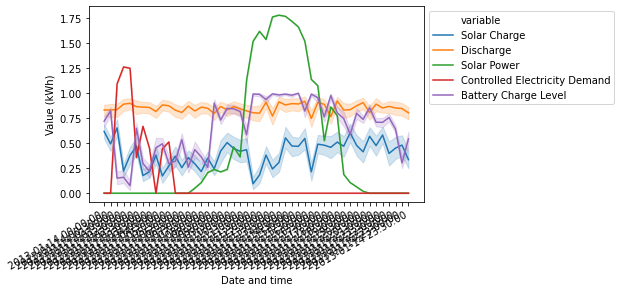

In [37]:
sns_plot = sns.lineplot(data=frame_plot[(frame_plot.datetime<"2013-01-15") & (frame_plot.battery_size==1)], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()